# Sentiment Analysis

## Project summary

In this project, a sentiment analysis of recent tweets is performed to evaluate if the overall emotion about a subject is negative or positive. The data is acumulated by web scraping 1000 recent tweets containing the terms 'covid', 'climate change' and 'crypto'. 

This analysis could be a starting point for a bussiness project interested in evaluating if clients are happy with your products and services in the Tweeter plataform. This information could be tracked over time to see if their sentiment are consistent over a certain period of time or if they change. It could also be useful to identify a category of customers who support your brand or product.

## Useful libraries

For this project we are going to use Tweetpy and spaCy libraries. More information on how to use them can be found in the links below: 
- https://docs.tweepy.org/en/stable/ 
- https://spacy.io/usage/spacy-101

### Import libraries

In [52]:
from dotenv import load_dotenv
import matplotlib.pyplot as plt
import os
import pandas as pd
import re
import spacy
from spacytextblob.spacytextblob import SpacyTextBlob
from statistics import mean
import tweepy

### Load environmental variables

Twitter API uses OAuth, which is an open authorization protocol to authenticate requests that allows you to approve one application interacting with another on your behalf without giving away your password. You will need to create and configure your authentication credentials (KEY, SECRET) to access Twitter API. More instructions can be found here: https://towardsdatascience.com/how-to-access-twitters-api-using-tweepy-5a13a206683b

I set my authentication credentials as environmental variables. More instructions can be found in the following link: https://nono.ma/environment-variable-python-notebook-os-environ-get

In [2]:
load_dotenv()
KEY = os.environ.get('KEY')
SECRET = os.environ.get('SECRET')

### Creating an OAuthHandler instance and API

With my authentication credentials in hand, we can create an OAuthHandler instance and creates an api, that allows us to use tools that can be used for example to search information in the tweeter plataform. 

In [3]:
auth = tweepy.OAuthHandler(KEY, SECRET)
api = tweepy.API(auth)

### Searching Tweets with a subject 'query'

The function *search_tweets* searches for a word or expression in an assemble of tweets. It has two arguments: *query* (the subject we want to look for) and *max_tweets* (the max number of tweets). 

In [4]:
def search_tweets(query, max_tweets):
    return [status for status in tweepy.Cursor(api.search_tweets, q=query,lang='en',result_type='recent').items(max_tweets)]
    

### Defining functions to help access data 

The function *extract_data* has a single argument *data* and returns a dictionary with the information of each tweet.

The function *extract_data_helper* returns a set with all the extracted data information.

In [5]:
def extract_data(data):
    '''
    Function: extract_data(data) 
        - data argument is the output of api.search_tweets
        - returns data in a easy format 
    '''
    return{
        "created_at": data.get("created_at",None),
        "id": data.get("id",None),
        "text": data.get("text",None),
        "language": data.get("lang",None),
        "retweet_count":data.get("retweet_count",None)        
    }
def extract_data_helper(dataList):
    return (extract_data(data._json) for data in dataList)

### Transforming into a dataframe

*get_dataframe* function extract the tweets and transforms the data into a pandas dataframe object.

In [6]:
def get_dataframe(subject, num_tweets):
    data = extract_data_helper(search_tweets(subject,num_tweets))
    df = pd.DataFrame(data)
    df = df.sort_values(by='retweet_count',ascending=False).reset_index(drop=True)
    return df

### Analysing sentiment

First step to the sentiment analysis is to remove symbols or set of characters such as 'RT @username' that are not relevant in the analysis. The function *clean_tweet* does exactly that.

The function *analysing_sentiment* has a single argument - a dataframe - and returns a list containing information on how positive or negative a tweet is. Each tweet is processed by a pipeline that generates a Doc object (more info: https://spacy.io/usage/processing-pipelines) which the polarity can be obtained by *doc._.polarity*. The value returned is a float number ranging between -1 (extremely negative) and 1 (extremely positive). 

In [20]:
# Load the default trained pipeline package 'en_core_web_sm' from within spaCy. 
# It is a small English pipeline trained on written web text (blogs, news, comments), 
# that includes vocabulary, syntax and entities.
nlp = spacy.load('en_core_web_sm')

# spaCyTextBlob is a pipeline component that enables sentiment analysis
nlp.add_pipe('spacytextblob')

def clean_tweet(text):
    clean_text = re.sub(r'([.?!,:;"\'…])|(RT @\w+ )|(@\w+ )]', '', text)
    return clean_text


def analysing_sentiment(dataframe):
    polarity = []
    # loop in tweets
    for tweet in dataframe.text:        
        tweet1 = clean_tweet(tweet)
        # processing pipeline
        doc = nlp(tweet1)
        if doc._.polarity != 0.0:
            polarity.append(doc._.polarity)
    return polarity

### Plot sentiment summary

*plot_sentiment* function returns a histogram with the overall polarity values returned from 1000 tweets.

In [71]:
def plot_sentiment(polarity, subject):
    avg = mean(polarity)
    plt.hist(polarity,bins=[x / 10.0 for x in range(-10, 12, 2)], label=f'$\mu$={round(avg,2)}', range=(-1,1))
    plt.xlabel('Number of tweets')
    plt.xlabel('Polarity')
    plt.title(f'Sentiment of Tweets on {subject}')
    plt.legend()
    plt.show()

### Results for different subjects

#### Covid
Let's analyse the sentiment for the word 'covid' considering a number maximum of tweets . 

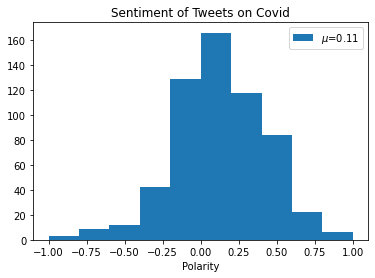

In [72]:
df = get_dataframe('covid -filter:retweets', 1000)
df = df.drop_duplicates()
polarity = analysing_sentiment(df)
plot_sentiment(polarity,'Covid')

The average value for the polarity for the 1000 tweets containing the word 'covid' is 0.11 meaning it is slightly positive but close to neutral sentiment.

#### Climate change

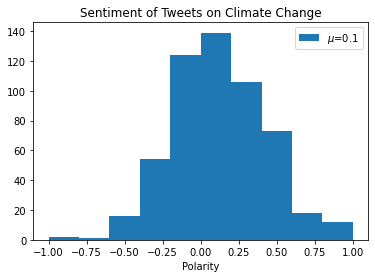

In [77]:
df = get_dataframe('climate change -filter:retweets', 1000)
df = df.drop_duplicates()
polarity = analysing_sentiment(df)
plot_sentiment(polarity,'Climate Change')

The average value for the polarity for the 1000 tweets containing the expression 'climate ghange' is 0.1 meaning it is slightly positive but close to neutral sentiment.

#### Crypto

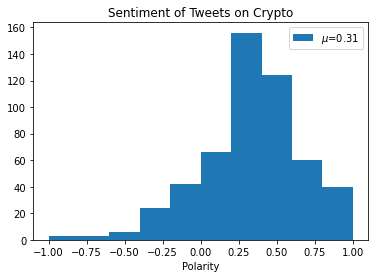

In [81]:
df = get_dataframe('crypto -filter:retweets', 1000)
df = df.drop_duplicates()
polarity = analysing_sentiment(df)
plot_sentiment(polarity,'Crypto')

The average value for the polarity for the 1000 tweets containing the expression 'crypto' is 0.29 meaning it has a more positive sentiment.

## Conclusions and insights

Sentiment analysis is a very powerful tool to undertand how much positive or negative emotions are attached to a certain subject. It can be used to add value to a company interested in investigating how its customers evaluate a product or a service they offer. This analysis can be used for product/service reviews from customers for example. 